# CNN for Image Classification
###  First we import the cifar10 dataset from the keras dataset libray  

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from keras import layers

In [ ]:
from keras.datasets import cifar10

In [ ]:
(x_train, y_train) , (x_test , y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


####  Next we convert the dataset from intger to float in order to avoid rounding problems when normalising the dataset 

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#### Next we normalize the dataset 

In [ ]:
mean = np.mean(x_train , axis = (0,1,2,3))
std = np.std(x_train , axis = (0,1,2,3))
x_train  = (x_train - mean) / (std + 1e-7)
x_test = (x_test - mean) / (std + 1e-7)

#### Next we reshape (flatten) the dataset inorder to make it suitable for MLP Network

In [ ]:
train_x = x_train.reshape(-1,3072)

In [ ]:
test_x = x_test.reshape(-1 , 3072)

#### In this section we splitted the  training data into training( 90%) and validation set (10%)

In [ ]:
# Here our goal is to split the data into train data and validation data 

def split_data(X, y,percent):
    #Created a dummy array with the size of the dataset 
    arr_rand = np.random.rand(X.shape[0])

    #This creates a randomly populated array of boolean variables the length 
    # of the arr_rand
    split = arr_rand < np.percentile(arr_rand, percent)
    #Here the spliting for test and train is carried out using the 
    #array of boolean variables 
    X_train = X[split]  
    y_train = y[split]
    X_test =  X[~split]
    y_test =  y[~split]

    # print(f"{len(X_train)}, {len(y_train)}, {len(X_test)}, {len(y_test)}")
    return X_train, y_train, X_test, y_test

In [ ]:
train_mlp , y_mlp , val_mlp , val_y = split_data(train_x , y_train , 90)

### Here we created the MLP  model using a class the subclasses the keras model class

In [ ]:
class MLP(Model):
  def __init__(self,input_shape = 3072):  
    super(MLP, self).__init__()
    self.model = Sequential()
    self.model.add( Dense(512, activation = 'sigmoid', input_shape =(input_shape, ) ) )
    self.model.add( Dense(512, activation = 'sigmoid') )
    self.model.add( Dense(10, activation = 'softmax') )

  def call(self, input):
    x = self.model(input)
    return x


### This section involves Training and evaluating the MLP models

#### First we will create three list, one to keep track of the number of MLP models, the second one to store the training accuracy for each model and the third to store the validation accuracy for each model.

In [ ]:
models = []
train_acc = []
val_acc = []
num_hidden_layer = []
number_params = []

####  This first MLP contains 
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Output layer with the suitable activation function and number of neurons for the classification task


In [ ]:
mlp = MLP()

In [ ]:
mlp.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp.model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
models.append(1)
num_hidden_layer.append(2)
number_params.append(1841162)

In [ ]:
batch_size = 32
epochs = 5
mlp.model.fit(x = train_mlp ,y = y_mlp , batch_size = batch_size, epochs = epochs, verbose = 2 , validation_data = (val_mlp , val_y))

Epoch 1/5
1407/1407 - 15s - loss: 1.7390 - accuracy: 0.3834 - val_loss: 1.6126 - val_accuracy: 0.4306
Epoch 2/5
1407/1407 - 3s - loss: 1.5666 - accuracy: 0.4416 - val_loss: 1.5468 - val_accuracy: 0.4452
Epoch 3/5
1407/1407 - 3s - loss: 1.4866 - accuracy: 0.4697 - val_loss: 1.5557 - val_accuracy: 0.4536
Epoch 4/5
1407/1407 - 3s - loss: 1.4253 - accuracy: 0.4929 - val_loss: 1.5012 - val_accuracy: 0.4708
Epoch 5/5
1407/1407 - 3s - loss: 1.3821 - accuracy: 0.5092 - val_loss: 1.4547 - val_accuracy: 0.4898


In [ ]:
print(mlp.model.history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
train_v = mlp.model.history.history['accuracy'][4]

In [ ]:
train_acc.append(mlp.model.history.history['accuracy'][4]) 

In [ ]:
val_acc.append(mlp.model.history.history['val_accuracy'][4]) 

####  This second MLP contains 
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Output layer with the suitable activation function and number of neurons for the classification task

In [ ]:
mlp_2 = MLP()

In [ ]:
mlp_2.model.pop()
mlp_2.model.add(Dense(512, activation = 'sigmoid'))
mlp_2.model.add(Dense(10, activation = 'softmax'))

In [ ]:
mlp_2.model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 2,103,818
Trainable params: 2,103,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp_2.model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
models.append(2)

In [ ]:
num_hidden_layer.append(3)
number_params.append(2103818)

In [ ]:
batch_size = 32
epochs = 5
mlp_2.model.fit(x = train_mlp ,y = y_mlp , batch_size = batch_size, epochs = epochs, verbose = 2 , validation_data = (val_mlp , val_y))

Epoch 1/5
1407/1407 - 4s - loss: 1.7562 - accuracy: 0.3695 - val_loss: 1.6307 - val_accuracy: 0.4142
Epoch 2/5
1407/1407 - 3s - loss: 1.5744 - accuracy: 0.4363 - val_loss: 1.5817 - val_accuracy: 0.4352
Epoch 3/5
1407/1407 - 3s - loss: 1.4973 - accuracy: 0.4657 - val_loss: 1.5470 - val_accuracy: 0.4514
Epoch 4/5
1407/1407 - 3s - loss: 1.4450 - accuracy: 0.4827 - val_loss: 1.5094 - val_accuracy: 0.4626
Epoch 5/5
1407/1407 - 3s - loss: 1.3977 - accuracy: 0.5009 - val_loss: 1.4680 - val_accuracy: 0.4752


In [ ]:
train_acc.append(mlp_2.model.history.history['accuracy'][-1]) 

In [ ]:
val_acc.append(mlp_2.model.history.history['val_accuracy'][-1]) 

####  This third MLP contains 
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Output layer with the suitable activation function and number of neurons for the classification task

In [ ]:
mlp_3 = MLP()

In [ ]:
mlp_3.model.pop()
mlp_3.model.add(Dense(512, activation = 'sigmoid'))
mlp_3.model.add(Dense(512, activation = 'sigmoid'))
mlp_3.model.add(Dense(10, activation = 'softmax'))

In [ ]:
mlp_3.model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 2,366,474
Trainable params: 2,366,474
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp_3.model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
models.append(3)
num_hidden_layer.append(4)
number_params.append(2366474)

In [ ]:
batch_size = 32
epochs = 5
mlp_3.model.fit(x = train_mlp ,y = y_mlp , batch_size = batch_size, epochs = epochs, verbose = 2 , validation_data = (val_mlp , val_y))

Epoch 1/5
1407/1407 - 4s - loss: 1.8269 - accuracy: 0.3374 - val_loss: 1.7004 - val_accuracy: 0.3838
Epoch 2/5
1407/1407 - 3s - loss: 1.6299 - accuracy: 0.4185 - val_loss: 1.6014 - val_accuracy: 0.4256
Epoch 3/5
1407/1407 - 3s - loss: 1.5446 - accuracy: 0.4481 - val_loss: 1.5757 - val_accuracy: 0.4396
Epoch 4/5
1407/1407 - 3s - loss: 1.4880 - accuracy: 0.4678 - val_loss: 1.5558 - val_accuracy: 0.4474
Epoch 5/5
1407/1407 - 3s - loss: 1.4398 - accuracy: 0.4851 - val_loss: 1.5297 - val_accuracy: 0.4616


In [ ]:
train_acc.append(mlp_3.model.history.history['accuracy'][-1]) 

In [ ]:
val_acc.append(mlp_3.model.history.history['val_accuracy'][-1]) 

####  This fourth  MLP contains 
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Output layer with the suitable activation function and number of neurons for the classification task

In [ ]:
mlp_4 = MLP()

In [ ]:
mlp_4.model.pop()
mlp_4.model.add(Dense(512, activation = 'sigmoid'))
mlp_4.model.add(Dense(512, activation = 'sigmoid'))
mlp_4.model.add(Dense(512, activation = 'sigmoid'))
mlp_4.model.add(Dense(10, activation = 'softmax'))

In [ ]:
mlp_4.model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                5130      
Total params: 2,629,130
Trainable params: 2,629,130
Non-trainable params: 0
____________________________________________

In [ ]:
mlp_4.model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
models.append(4)
num_hidden_layer.append(5)
number_params.append(2629130)

In [ ]:
batch_size = 32
epochs = 5
mlp_4.model.fit(x = train_mlp ,y = y_mlp , batch_size = batch_size, epochs = epochs, verbose = 2 , validation_data = (val_mlp , val_y))

Epoch 1/5
1407/1407 - 4s - loss: 1.9116 - accuracy: 0.2920 - val_loss: 1.7827 - val_accuracy: 0.3526
Epoch 2/5
1407/1407 - 3s - loss: 1.6961 - accuracy: 0.3926 - val_loss: 1.6622 - val_accuracy: 0.4036
Epoch 3/5
1407/1407 - 3s - loss: 1.6082 - accuracy: 0.4270 - val_loss: 1.6075 - val_accuracy: 0.4238
Epoch 4/5
1407/1407 - 3s - loss: 1.5450 - accuracy: 0.4496 - val_loss: 1.6023 - val_accuracy: 0.4144
Epoch 5/5
1407/1407 - 3s - loss: 1.4893 - accuracy: 0.4690 - val_loss: 1.5525 - val_accuracy: 0.4418


In [ ]:
train_acc.append(mlp_4.model.history.history['accuracy'][-1]) 

In [ ]:
val_acc.append(mlp_4.model.history.history['val_accuracy'][-1]) 

####  This fifth  MLP contains 
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Output layer with the suitable activation function and number of neurons for the classification task

In [ ]:
mlp_5 = MLP()

In [ ]:
mlp_5.model.pop()
mlp_5.model.add(Dense(512, activation = 'sigmoid'))
mlp_5.model.add(Dense(512, activation = 'sigmoid'))
mlp_5.model.add(Dense(512, activation = 'sigmoid'))
mlp_5.model.add(Dense(512, activation = 'sigmoid'))
mlp_5.model.add(Dense(10, activation = 'softmax'))

In [ ]:
mlp_5.model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_24 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_28 (Dense)             (None, 10)               

In [ ]:
mlp_5.model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
models.append(5)
num_hidden_layer.append(6)
number_params.append(2891786)

In [ ]:
batch_size = 32
epochs = 5
mlp_5.model.fit(x = train_mlp ,y = y_mlp , batch_size = batch_size, epochs = epochs, verbose = 2 , validation_data = (val_mlp , val_y))

Epoch 1/5
1407/1407 - 5s - loss: 2.0280 - accuracy: 0.2197 - val_loss: 1.8898 - val_accuracy: 0.3028
Epoch 2/5
1407/1407 - 3s - loss: 1.8119 - accuracy: 0.3334 - val_loss: 1.7711 - val_accuracy: 0.3612
Epoch 3/5
1407/1407 - 3s - loss: 1.6957 - accuracy: 0.3885 - val_loss: 1.6780 - val_accuracy: 0.4018
Epoch 4/5
1407/1407 - 3s - loss: 1.6179 - accuracy: 0.4218 - val_loss: 1.6245 - val_accuracy: 0.4166
Epoch 5/5
1407/1407 - 3s - loss: 1.5617 - accuracy: 0.4422 - val_loss: 1.6221 - val_accuracy: 0.4218


In [ ]:
train_acc.append(mlp_5.model.history.history['accuracy'][-1]) 

In [ ]:
val_acc.append(mlp_5.model.history.history['val_accuracy'][-1]) 

####  This sixth MLP contains 
#### &emsp; • Fully connected layer with 64 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 128 units and a sigmoid activation function
#### &emsp; • Output layer with the suitable activation function and number of neurons for the classification task

In [ ]:
inputs = keras.Input(shape=(3072,))
x = keras.layers.Dense(64, activation='sigmoid')(inputs)
y = keras.layers.Dense(128, activation='sigmoid')(x)
outputs = keras.layers.Dense(10, activation="softmax")(y)
model_six = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_six.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_30 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                1290      
Total params: 206,282
Trainable params: 206,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_six.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
models.append(6)
num_hidden_layer.append(2)
number_params.append(206282)

In [ ]:
batch_size = 32
epochs = 5
model_six.fit(x = train_mlp ,y = y_mlp , batch_size = batch_size, epochs = epochs, verbose = 2 , validation_data = (val_mlp , val_y))

Epoch 1/5
1407/1407 - 3s - loss: 1.8251 - accuracy: 0.3551 - val_loss: 1.7523 - val_accuracy: 0.3842
Epoch 2/5
1407/1407 - 3s - loss: 1.7008 - accuracy: 0.4015 - val_loss: 1.6972 - val_accuracy: 0.4016
Epoch 3/5
1407/1407 - 3s - loss: 1.6478 - accuracy: 0.4220 - val_loss: 1.6814 - val_accuracy: 0.4060
Epoch 4/5
1407/1407 - 2s - loss: 1.6066 - accuracy: 0.4346 - val_loss: 1.6413 - val_accuracy: 0.4238
Epoch 5/5
1407/1407 - 2s - loss: 1.5728 - accuracy: 0.4433 - val_loss: 1.6224 - val_accuracy: 0.4306


In [ ]:
train_acc.append(model_six.history.history['accuracy'][-1]) 

In [ ]:
val_acc.append(model_six.history.history['val_accuracy'][-1]) 

####  This seventh MLP contains 
#### &emsp; • Fully connected layer with 64 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 128 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Output layer with the suitable activation function and number of neurons for the classification task

In [ ]:
inputs = keras.Input(shape=(3072,))
c = keras.layers.Dense(64, activation='sigmoid')(inputs)
d = keras.layers.Dense(128, activation='sigmoid')(c)
e = keras.layers.Dense(512, activation='sigmoid')(d)
outputs = keras.layers.Dense(10, activation="softmax")(e)
model_seven = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_seven.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_33 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_34 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                5130      
Total params: 276,170
Trainable params: 276,170
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_seven.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
models.append(7)
num_hidden_layer.append(3)
number_params.append(276170)

In [ ]:
batch_size = 32
epochs = 5
model_seven.fit(x = train_mlp ,y = y_mlp , batch_size = batch_size, epochs = epochs, verbose = 2 , validation_data = (val_mlp , val_y))

Epoch 1/5
1407/1407 - 4s - loss: 1.8937 - accuracy: 0.3056 - val_loss: 1.8124 - val_accuracy: 0.3470
Epoch 2/5
1407/1407 - 3s - loss: 1.7355 - accuracy: 0.3783 - val_loss: 1.7292 - val_accuracy: 0.3806
Epoch 3/5
1407/1407 - 3s - loss: 1.6691 - accuracy: 0.4041 - val_loss: 1.6779 - val_accuracy: 0.3954
Epoch 4/5
1407/1407 - 3s - loss: 1.6193 - accuracy: 0.4221 - val_loss: 1.6481 - val_accuracy: 0.4068
Epoch 5/5
1407/1407 - 3s - loss: 1.5853 - accuracy: 0.4352 - val_loss: 1.6245 - val_accuracy: 0.4172


In [ ]:
train_acc.append(model_seven.history.history['accuracy'][-1]) 

In [ ]:
val_acc.append(model_seven.history.history['val_accuracy'][-1]) 

####  This eighth  MLP contains 
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 256 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 128 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 64 units and a sigmoid activation function
#### &emsp; • Output layer with the suitable activation function and number of neurons for the classification task

In [ ]:
mlp_8 = MLP()

In [ ]:
mlp_8.model.pop()
mlp_8.model.pop()
mlp_8.model.add(Dense(256, activation = 'sigmoid'))
mlp_8.model.add(Dense(128, activation = 'sigmoid'))
mlp_8.model.add(Dense(64, activation = 'sigmoid'))
mlp_8.model.add(Dense(10, activation = 'softmax'))

In [ ]:
mlp_8.model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_39 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_40 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_41 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_42 (Dense)             (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp_8.model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
models.append(8)
num_hidden_layer.append(4)
number_params.append(1746506)

In [ ]:
batch_size = 32
epochs = 5
mlp_8.model.fit(x = train_mlp ,y = y_mlp , batch_size = batch_size, epochs = epochs, verbose = 2 , validation_data = (val_mlp , val_y))

Epoch 1/5
1407/1407 - 4s - loss: 1.8416 - accuracy: 0.3343 - val_loss: 1.7248 - val_accuracy: 0.3786
Epoch 2/5
1407/1407 - 3s - loss: 1.6524 - accuracy: 0.4096 - val_loss: 1.6678 - val_accuracy: 0.4036
Epoch 3/5
1407/1407 - 3s - loss: 1.5795 - accuracy: 0.4357 - val_loss: 1.5967 - val_accuracy: 0.4252
Epoch 4/5
1407/1407 - 3s - loss: 1.5233 - accuracy: 0.4545 - val_loss: 1.5745 - val_accuracy: 0.4336
Epoch 5/5
1407/1407 - 3s - loss: 1.4786 - accuracy: 0.4754 - val_loss: 1.5519 - val_accuracy: 0.4452


In [ ]:
train_acc.append(mlp_8.model.history.history['accuracy'][-1]) 

In [ ]:
val_acc.append(mlp_8.model.history.history['val_accuracy'][-1]) 

####  This ninth  MLP contains 
#### &emsp; • Fully connected layer with 64 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 128 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 256 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 128 units and a sigmoid activation function
#### &emsp; • Output layer with the suitable activation function and number of neurons for the classification task

In [ ]:
inputs = keras.Input(shape=(3072,))
o = keras.layers.Dense(64, activation='sigmoid')(inputs)
k = keras.layers.Dense(128, activation='sigmoid')(o)
p = keras.layers.Dense(256, activation='sigmoid')(k)
q = keras.layers.Dense(512, activation='sigmoid')(p)
r = keras.layers.Dense(128, activation='sigmoid')(q)
outputs = keras.layers.Dense(10, activation="softmax")(r)
model_nine = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_nine.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_43 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_44 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_45 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_46 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_47 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_48 (Dense)             (None, 10)                1290

In [ ]:
model_nine.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
models.append(9)
num_hidden_layer.append(5)
number_params.append(436554)

In [ ]:
batch_size = 32
epochs = 5
model_nine.fit(x = train_mlp ,y = y_mlp , batch_size = batch_size, epochs = epochs, verbose = 2 , validation_data = (val_mlp , val_y))

Epoch 1/5
1407/1407 - 4s - loss: 2.0164 - accuracy: 0.2227 - val_loss: 1.9195 - val_accuracy: 0.2758
Epoch 2/5
1407/1407 - 3s - loss: 1.8648 - accuracy: 0.3157 - val_loss: 1.8467 - val_accuracy: 0.3296
Epoch 3/5
1407/1407 - 3s - loss: 1.7978 - accuracy: 0.3475 - val_loss: 1.7881 - val_accuracy: 0.3512
Epoch 4/5
1407/1407 - 3s - loss: 1.7459 - accuracy: 0.3698 - val_loss: 1.7652 - val_accuracy: 0.3620
Epoch 5/5
1407/1407 - 3s - loss: 1.7052 - accuracy: 0.3866 - val_loss: 1.7190 - val_accuracy: 0.3840


In [ ]:
train_acc.append(model_nine.history.history['accuracy'][-1]) 

In [ ]:
val_acc.append(model_nine.history.history['val_accuracy'][-1]) 

####  This tenth  MLP contains 
#### &emsp; • Fully connected layer with 512 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 256 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 128 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 64 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 32 units and a sigmoid activation function
#### &emsp; • Fully connected layer with 16 units and a sigmoid activation function
#### &emsp; • Output layer with the suitable activation function and number of neurons for the classification task

In [ ]:
mlp_10 = MLP()

In [ ]:
mlp_10.model.pop()
mlp_10.model.pop()
mlp_10.model.add(Dense(256, activation = 'sigmoid'))
mlp_10.model.add(Dense(128, activation = 'sigmoid'))
mlp_10.model.add(Dense(64, activation = 'sigmoid'))
mlp_10.model.add(Dense(32, activation = 'sigmoid'))
mlp_10.model.add(Dense(16, activation = 'sigmoid'))
mlp_10.model.add(Dense(10, activation = 'softmax'))

In [ ]:
mlp_10.model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_52 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_53 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_54 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_55 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_56 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_57 (Dense)             (None, 10)               

In [ ]:
mlp_10.model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
models.append(10)
num_hidden_layer.append(6)
number_params.append(1748634)

In [ ]:
batch_size = 32
epochs = 5
mlp_10.model.fit(x = train_mlp ,y = y_mlp , batch_size = batch_size, epochs = epochs, verbose = 2 , validation_data = (val_mlp , val_y))

Epoch 1/5
1407/1407 - 4s - loss: 2.0877 - accuracy: 0.1958 - val_loss: 1.9975 - val_accuracy: 0.2398
Epoch 2/5
1407/1407 - 3s - loss: 1.9288 - accuracy: 0.2618 - val_loss: 1.8799 - val_accuracy: 0.3082
Epoch 3/5
1407/1407 - 3s - loss: 1.8288 - accuracy: 0.3102 - val_loss: 1.8120 - val_accuracy: 0.3334
Epoch 4/5
1407/1407 - 3s - loss: 1.7751 - accuracy: 0.3368 - val_loss: 1.7999 - val_accuracy: 0.3358
Epoch 5/5
1407/1407 - 3s - loss: 1.7211 - accuracy: 0.3595 - val_loss: 1.7436 - val_accuracy: 0.3622


In [ ]:
train_acc.append(mlp_10.model.history.history['accuracy'][-1]) 

In [ ]:
val_acc.append(mlp_10.model.history.history['val_accuracy'][-1]) 

#### Displaying Results 

In [ ]:
acc_train = np.around(train_acc, decimals=3, out=None)

In [ ]:
acc_val = np.around(val_acc, decimals=3, out=None)

In [ ]:
vls = np.c_[models,acc_train,acc_val,num_hidden_layer, number_params]

In [ ]:
df = pd.DataFrame(data = vls,columns=['models' , 'training accuracies','validation accuracies',"num_hidden_layer","num_of_parameters"])

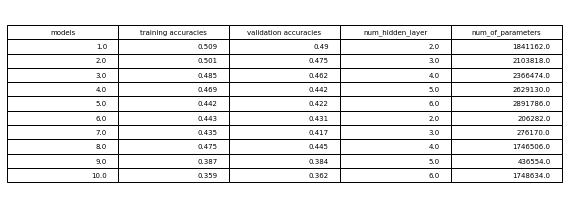

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 3)
fig.patch.set_visible(True)
ax.axis('off')
ax.axis('tight')
ax.table(cellText= df.values, colLabels= df.columns,loc='center')
fig.tight_layout()
fig.savefig('accuracy_table.png', dpi=100)
plt.show()

#### Testing the MLP model
##### Here we used the best MLP network(Which is the first network) to predict on the test data

In [ ]:
prediction = mlp.model.predict(test_x)

In [ ]:
y_pred = np.argmax(prediction, axis=1)

In [ ]:
mlp_test = accuracy_score(y_test, y_pred)

### Next we create two arrays, the first one stores the train accuracy for best MLP , CNN 1 and CNN 2 the second stores the test accuracy for the best MLP , CNN 1 and CNN 2

In [ ]:
acc = []
test = []

In [ ]:
#Here we store the train and test accuracies for mlp
acc.append(train_v)
test.append(mlp_test)

### Next we create a callback function to calculate and return the training time for each CNN model.

In [ ]:
import time 
class timecallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.times = []
        # use this value as reference to calculate cumulative time taken
        self.timetaken = time.process_time()
    def on_epoch_end(self,epoch,logs = {}):
        self.times.append((epoch, time.process_time() - self.timetaken))
    def on_train_end(self,logs = {}):
        from operator import itemgetter
        previous_time = 0
        for item in self.times:
            # print("Epoch ", item[0], " run time is: ", item[1]-previous_time)
            previous_time = item[1]
        print("Total trained time is: ", previous_time)

timetaken = timecallback()
callbacks = [
    timetaken
]


### Here we created the CNN  models
#### First we created the 2D Convolutional layer with the relu activation function by subclassing the layers class in keras.

In [ ]:
class CNNSect(layers.Layer):
  def __init__(self, out_channels, kernel_size = (3,3) ):
    super(CNNSect , self).__init__()
    self.conv = layers.Conv2D(out_channels, kernel_size)

  def call(self, input_tensor):
    x = self.conv(input_tensor)
    x = tf.nn.relu(x)
    return x       


#### Next we created the CNN 1 using the keras sequenctial API

In [ ]:
cnn_one = keras.Sequential(
        [
          CNNSect(64),
          CNNSect(64),
          layers.Flatten(),
          layers.Dense(512, activation = 'sigmoid'),         
          layers.Dense(512, activation = 'sigmoid'),
          layers.Dense(10, activation = 'softmax')
        ]
)

In [ ]:
cnn_one.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
#Here we obtained the validation set for data in 3D for the covolution model
x_train_cnn , y_train_cnn , val_x_cnn , val_y_cnn = split_data(x_train , y_train , 90)

In [ ]:
batch_size = 32
epochs = 5
cnn_one.fit(x = x_train_cnn , y = y_train_cnn, batch_size = batch_size, epochs = epochs, callbacks=callbacks , verbose = 2 , validation_data=(val_x_cnn,val_y_cnn))
# cnn_one.evaluate(x_test, y_test , batch_size = batch_size, verbose = 2)

Epoch 1/5
1407/1407 - 27s - loss: 1.3060 - accuracy: 0.5260 - val_loss: 1.0223 - val_accuracy: 0.6398
Epoch 2/5
1407/1407 - 5s - loss: 0.8013 - accuracy: 0.7212 - val_loss: 0.9947 - val_accuracy: 0.6608
Epoch 3/5
1407/1407 - 5s - loss: 0.4254 - accuracy: 0.8564 - val_loss: 1.0938 - val_accuracy: 0.6682
Epoch 4/5
1407/1407 - 5s - loss: 0.1462 - accuracy: 0.9550 - val_loss: 1.4069 - val_accuracy: 0.6550
Epoch 5/5
1407/1407 - 5s - loss: 0.0682 - accuracy: 0.9787 - val_loss: 1.7646 - val_accuracy: 0.6526
Total trained time is:  42.53964423100001


In [ ]:
history_cnn_1 = cnn_one.history.history

In [ ]:
acc.append(cnn_one.history.history['accuracy'][-1])


In [ ]:
prediction_cnn_1 = cnn_one.predict(x_test)

In [ ]:
y_pred_cnn_1 = np.argmax(prediction_cnn_1, axis=1)

In [ ]:
cnn_one_test = accuracy_score(y_test, y_pred_cnn_1)

In [ ]:
test.append(cnn_one_test)

#### Next we created the CNN 2 using the keras sequenctial API

In [ ]:
cnn_two = keras.Sequential(
        [
          CNNSect(64),
          layers.MaxPooling2D(pool_size=(2,2)),
          CNNSect(64),
          layers.MaxPooling2D(pool_size=(2,2)),
          layers.Flatten(),
          layers.Dense(512, activation = 'sigmoid'),   
          layers.Dropout(0.2),      
          layers.Dense(512, activation = 'sigmoid'),
          layers.Dropout(0.2),
          layers.Dense(10, activation = 'softmax')
        ]
)

In [ ]:
cnn_two.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
batch_size = 32
epochs = 5
cnn_two.fit(x = x_train_cnn , y = y_train_cnn, batch_size = batch_size, epochs = epochs,callbacks=callbacks,verbose = 2 , validation_data=(val_x_cnn,val_y_cnn))
# cnn_one.evaluate(x_test, y_test , batch_size = batch_size, verbose = 2)

Epoch 1/5
1407/1407 - 6s - loss: 1.4025 - accuracy: 0.4894 - val_loss: 1.1303 - val_accuracy: 0.5914
Epoch 2/5
1407/1407 - 4s - loss: 0.9918 - accuracy: 0.6491 - val_loss: 0.9322 - val_accuracy: 0.6722
Epoch 3/5
1407/1407 - 4s - loss: 0.8139 - accuracy: 0.7130 - val_loss: 0.8241 - val_accuracy: 0.7156
Epoch 4/5
1407/1407 - 4s - loss: 0.6766 - accuracy: 0.7632 - val_loss: 0.7875 - val_accuracy: 0.7332
Epoch 5/5
1407/1407 - 4s - loss: 0.5598 - accuracy: 0.8029 - val_loss: 0.8440 - val_accuracy: 0.7102
Total trained time is:  78.82739322900005


In [ ]:
history_cnn_2 = cnn_two.history.history

In [ ]:
acc.append(cnn_two.history.history['accuracy'][-1])


In [ ]:
prediction_cnn_2 = cnn_two.predict(x_test)

In [ ]:
y_pred_cnn_2 = np.argmax(prediction_cnn_2, axis=1)

In [ ]:
cnn_two_test = accuracy_score(y_test, y_pred_cnn_2)

In [ ]:
test.append(cnn_two_test)

#### Next we display the train and test accuracy of the networks

In [ ]:
acc_x = np.around(acc, decimals=3, out=None)

In [ ]:
acc_y = np.around(test, decimals=3, out=None)

In [ ]:
vln = np.c_[acc_x, acc_y]

In [ ]:
df_1 = pd.DataFrame(data = vln, index = ['MLP' , 'CNN1' , 'CNN2'],columns=['training accuracies','test accuracies'])

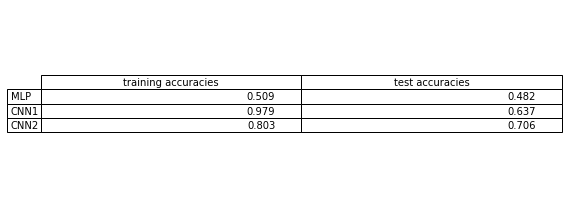

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 3)
fig.patch.set_visible(True)
ax.axis('off')
ax.axis('tight')
ax.table(cellText= df_1.values,rowLabels=df_1.index ,colLabels= df_1.columns,loc='center')
fig.tight_layout()
fig.savefig('networks_accuracy.png', dpi=100)
plt.show()

### Here we plotted the graph of the training accuracy and loss for both CNNs'

In [ ]:
accuracy_one = history_cnn_1["accuracy"]

In [ ]:
loss_one = history_cnn_1["loss"]

In [ ]:
val_accuracy = history_cnn_1["val_accuracy"]

In [ ]:
val_loss = history_cnn_1["val_loss"]

In [ ]:
accuracy_two = history_cnn_2["accuracy"]

In [ ]:
loss_two = history_cnn_2["loss"]

In [ ]:
val_accuracy_two = history_cnn_2["val_accuracy"]

In [ ]:
val_loss_two = history_cnn_2["val_loss"]

In [ ]:
epochs = [1,2,3,4,5]

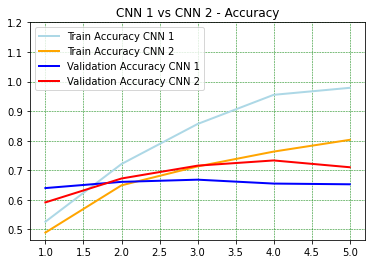

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(epochs, accuracy_one, color='lightblue', linewidth=2)
ax.plot(epochs, accuracy_two, color='orange', linewidth=2)
ax.plot(epochs, val_accuracy, color='blue', linewidth=2)
ax.plot(epochs, val_accuracy_two, color='red', linewidth=2)
ax.set_xlim(auto = True)
ax.set_ylim(top = 1.2)
plt.title("CNN 1 vs CNN 2 - Accuracy")
plt.grid(which='major',color='green',linestyle = '--', linewidth = 0.5)
plt.legend(["Train Accuracy CNN 1 ", "Train Accuracy CNN 2","Validation Accuracy CNN 1", "Validation Accuracy CNN 2"])
plt.savefig('accuracy_compare.png',dpi=100)

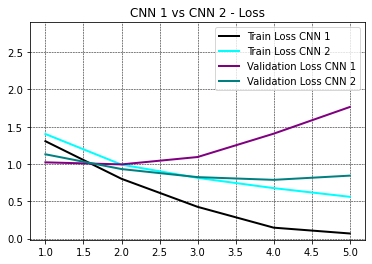

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(epochs, loss_one, color='black', linewidth=2)
ax.plot(epochs, loss_two, color='aqua', linewidth=2)
ax.plot(epochs, val_loss, color='purple', linewidth=2)
ax.plot(epochs, val_loss_two, color='teal', linewidth=2)
ax.set_xlim(auto = True)
ax.set_ylim(top = 2.9)
plt.title("CNN 1 vs CNN 2 - Loss")
plt.grid(which='major',color='black',linestyle = '--', linewidth = 0.5, zorder = 0.01)
plt.legend(["Train Loss CNN 1", "Train Loss CNN 2" , "Validation Loss CNN 1", "Validation Loss CNN 2"])
plt.savefig('loss_compare.png',dpi=100)